In [1]:
import numpy
import tqdm
import scipy
import scipy.stats
import matplotlib
import matplotlib.pyplot
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

In [2]:
# specify the dataset settings (a mixutre of gaussian)

pi = numpy.array([0.5, 0.5])
ita_0 = numpy.array([0.5, 0.5])
ita_1 = numpy.array([0.5, 0.5])
mu_0_0 = numpy.array([4.0]) 
mu_0_1 = numpy.array([-64.0]) 
mu_1_0 = numpy.array([-4.0])
mu_1_1 = numpy.array([72.0 ]) 
cov_0_0 = numpy.array([960.0])
cov_0_1 = numpy.array([1280.0])
cov_1_0 = numpy.array([980.0])
cov_1_1 = numpy.array([1024.0])

In [3]:
# generate the feature and label samples

N = 10000
y = scipy.stats.multinomial.rvs(p=numpy.hstack([pi[0]*ita_0, pi[1]*ita_1]), size=N, n=1)
x = [scipy.stats.multivariate_normal.rvs(mean=mu_0_0, cov=cov_0_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_0_1, cov=cov_0_1, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_1_0, cov=cov_1_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_1_1, cov=cov_1_1, size=N).reshape(-1, 1)]

x = x[0] * y[:, 0].reshape(-1, 1) + x[1] * y[:, 1].reshape(-1, 1) + \
    x[2] * y[:, 2].reshape(-1, 1) + x[3] * y[:, 3].reshape(-1, 1)

y = numpy.vstack([y[:, 0] + y[:, 1],
                  y[:, 2] + y[:, 3]]).transpose()

In [4]:
# specify the visualisation settings

N_grid = 1024
edge = 160.0
v_edge = 160.0
x_mesh = numpy.linspace(-edge, edge, N_grid).reshape(-1, 1)

In [5]:
# calculate the corresponding densities and probabilities

p_x_y = numpy.vstack([pi[0] * ita_0[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_0, cov=cov_0_0) +
                      pi[1] * ita_0[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_1, cov=cov_0_1),
                      pi[1] * ita_1[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_0, cov=cov_1_0) +
                      pi[1] * ita_1[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_1, cov=cov_1_1)])

p_x =  numpy.sum(p_x_y, axis=0)

p_y_g_x = p_x_y / p_x

p_x = p_x
p_x_y = p_x_y
p_x_g_y = p_x_y / pi.reshape(-1, 1)

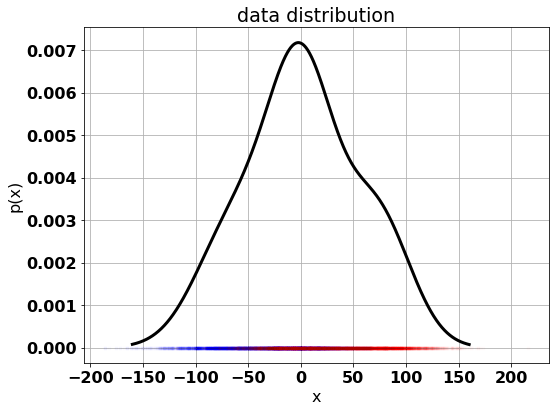

In [6]:
# joint densities

matplotlib.pyplot.figure(figsize=(8.0, 6.0))
matplotlib.pyplot.plot(x_mesh, p_x, 'k', linewidth=3.0)
matplotlib.pyplot.plot(x[y[:, 0]==1], numpy.zeros(numpy.sum(y[:, 0]==1)), 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(x[y[:, 0]==0], numpy.zeros(numpy.sum(y[:, 0]==0)), 'ro', markersize=3, alpha=0.01)
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('p(x)')
matplotlib.pyplot.title('data distribution')
matplotlib.pyplot.grid()
matplotlib.pyplot.tight_layout()

Text(0.5, 1.0, 'class 2 distribution')

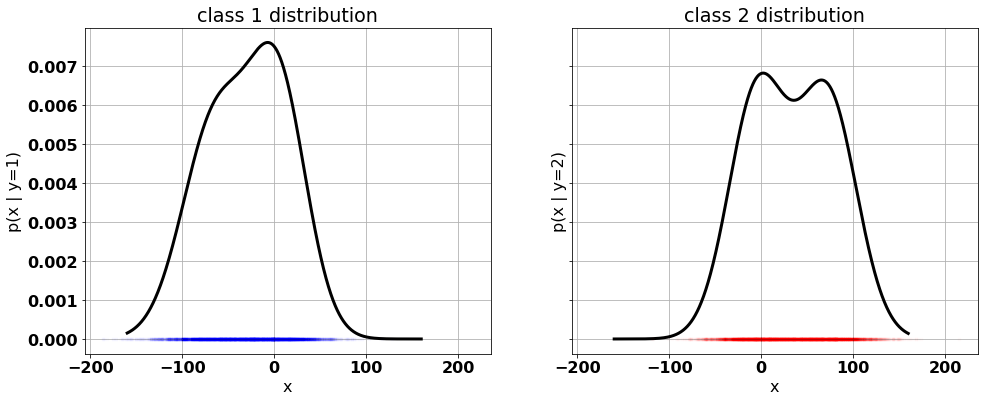

In [7]:
# conditional densities 

fig, axlist = matplotlib.pyplot.subplots(1, 2, figsize=(16,6), sharex=True, sharey=True)
axlist[0].plot(x_mesh, p_x_g_y[0, :], 'k', linewidth=3.0)
axlist[0].plot(x[y[:, 0]==1], numpy.zeros(numpy.sum(y[:, 0]==1)), 'bo', markersize=3, alpha=0.01)
axlist[0].grid()
axlist[0].set_xlabel('x')
axlist[0].set_ylabel('p(x | y=1)')
axlist[0].set_title('class 1 distribution')
axlist[1].plot(x_mesh, p_x_g_y[1, :], 'k', linewidth=3.0)
axlist[1].plot(x[y[:, 0]==0], numpy.zeros(numpy.sum(y[:, 0]==0)), 'ro', markersize=3, alpha=0.01)
axlist[1].grid()
axlist[1].set_xlabel('x')
axlist[1].set_ylabel('p(x | y=2)')
axlist[1].set_title('class 2 distribution')

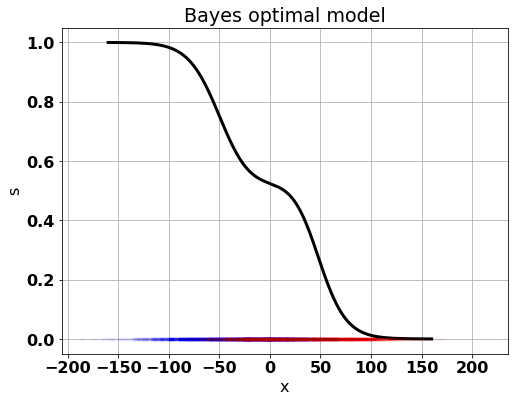

In [8]:
# predicted probabilities for class 1
matplotlib.pyplot.figure(figsize=(8.0, 6.0))
matplotlib.pyplot.plot(x_mesh, p_y_g_x[0], 'k', linewidth=3.0)
matplotlib.pyplot.plot(x[y[:, 0]==1], numpy.zeros(numpy.sum(y[:, 0]==1)), 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(x[y[:, 0]==0], numpy.zeros(numpy.sum(y[:, 0]==0)), 'ro', markersize=3, alpha=0.01)
# matplotlib.pyplot.ylim([0, 1])
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel('s')
matplotlib.pyplot.title('Bayes optimal model')
matplotlib.pyplot.grid()

In [9]:
# calculate densities of the predicted probabilities

N = int(1e6)
N_sim = int(128)
p_s = numpy.zeros(N_grid-1)
p_s_0 = numpy.zeros(N_grid-1)
p_s_1 = numpy.zeros(N_grid-1)
for i in tqdm.trange(0, N_sim):
    y = scipy.stats.multinomial.rvs(p=numpy.hstack([pi[0]*ita_0, pi[1]*ita_1]), size=N, n=1)

    x = [scipy.stats.multivariate_normal.rvs(mean=mu_0_0, cov=cov_0_0, size=N).reshape(-1, 1),
         scipy.stats.multivariate_normal.rvs(mean=mu_0_1, cov=cov_0_1, size=N).reshape(-1, 1),
         scipy.stats.multivariate_normal.rvs(mean=mu_1_0, cov=cov_1_0, size=N).reshape(-1, 1),
         scipy.stats.multivariate_normal.rvs(mean=mu_1_1, cov=cov_1_1, size=N).reshape(-1, 1)]

    x = x[0] * y[:, 0].reshape(-1, 1) + x[1] * y[:, 1].reshape(-1, 1) + \
        x[2] * y[:, 2].reshape(-1, 1) + x[3] * y[:, 3].reshape(-1, 1)

    y = numpy.vstack([y[:, 0] + y[:, 1],
                      y[:, 2] + y[:, 3]]).transpose()

    p_x_y_sample = numpy.vstack([pi[0] * ita_0[0] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_0_0, cov=cov_0_0) +
                                 pi[0] * ita_0[1] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_0_1, cov=cov_0_1),
                                 pi[1] * ita_1[0] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_1_0, cov=cov_1_0) +
                                 pi[1] * ita_1[1] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_1_1, cov=cov_1_1)])

    p_x_sample =  numpy.sum(p_x_y_sample, axis=0)

    s_sample = (p_x_y_sample / p_x_sample).transpose()

    p_s = p_s + numpy.histogram(s_sample[:, 0], bins=numpy.linspace(0, 1, N_grid))[0]
    p_s_0 = p_s_0 + numpy.histogram(s_sample[y[:, 0]==1, 0], bins=numpy.linspace(0, 1, N_grid))[0]
    p_s_1 = p_s_1 + numpy.histogram(s_sample[y[:, 1]==1, 0], bins=numpy.linspace(0, 1, N_grid))[0]
    
p_s = p_s
p_s_0 = p_s_0
p_s_1 = p_s_1

100%|██████████| 128/128 [01:10<00:00,  1.81it/s]


In [10]:
# draw samples and calculate corresponding values

N = 10000
y = scipy.stats.multinomial.rvs(p=numpy.hstack([pi[0]*ita_0, pi[1]*ita_1]), size=N, n=1)
x = [scipy.stats.multivariate_normal.rvs(mean=mu_0_0, cov=cov_0_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_0_1, cov=cov_0_1, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_1_0, cov=cov_1_0, size=N).reshape(-1, 1),
     scipy.stats.multivariate_normal.rvs(mean=mu_1_1, cov=cov_1_1, size=N).reshape(-1, 1)]

x = x[0] * y[:, 0].reshape(-1, 1) + x[1] * y[:, 1].reshape(-1, 1) + \
    x[2] * y[:, 2].reshape(-1, 1) + x[3] * y[:, 3].reshape(-1, 1)

y = numpy.vstack([y[:, 0] + y[:, 1],
                  y[:, 2] + y[:, 3]]).transpose()

p_x_y_sample = numpy.vstack([pi[0] * ita_0[0] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_0_0, cov=cov_0_0) +
                             pi[0] * ita_0[1] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_0_1, cov=cov_0_1), 
                             pi[1] * ita_1[0] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_1_0, cov=cov_1_0) +
                             pi[1] * ita_1[1] * scipy.stats.multivariate_normal.pdf(x=x, mean=mu_1_1, cov=cov_1_1)])

p_x_sample =  numpy.sum(p_x_y_sample, axis=0)

s_sample = (p_x_y_sample / p_x_sample).transpose()

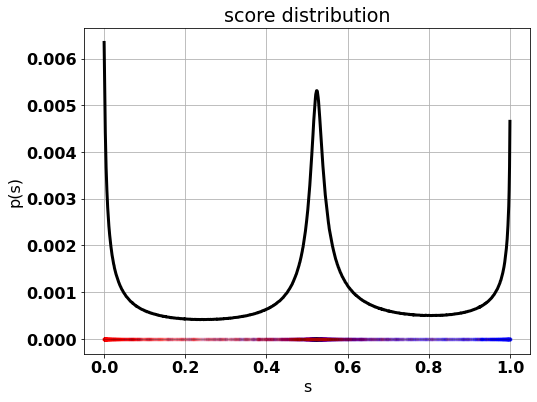

In [11]:
# joint density

matplotlib.pyplot.figure(figsize=(8.0, 6.0))
matplotlib.pyplot.plot(numpy.linspace(0, 1, N_grid-1), p_s/numpy.sum(p_s), 'k', linewidth=3.0)
matplotlib.pyplot.plot(s_sample[y[:, 0]==1, 0], numpy.zeros(numpy.sum(y[:, 0]==1)), 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(s_sample[y[:, 0]==0, 0], numpy.zeros(numpy.sum(y[:, 0]==0)), 'ro', markersize=3, alpha=0.01)
matplotlib.pyplot.xlabel('s')
matplotlib.pyplot.ylabel('p(s)')
matplotlib.pyplot.title('score distribution')
matplotlib.pyplot.grid()

Text(0.5, 1.0, 'class 2 distribution')

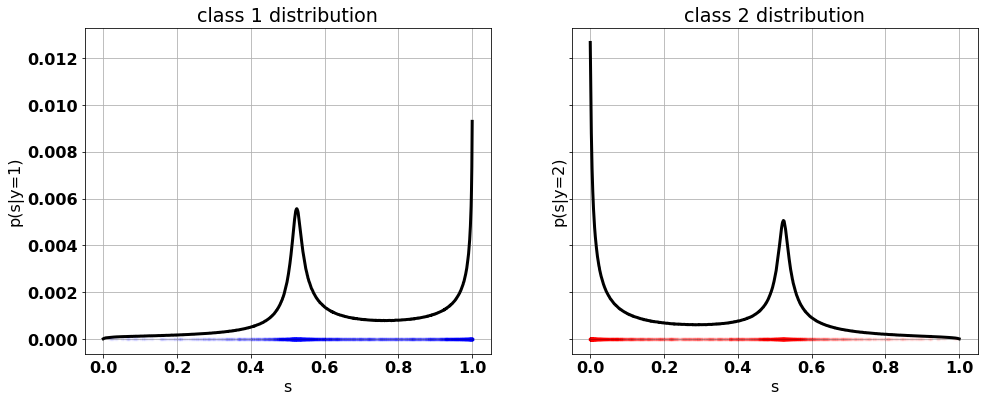

In [12]:
# class-wise conditional density

fig, axlist = matplotlib.pyplot.subplots(1, 2, figsize=(16, 6), sharey=True)
axlist[0].plot(numpy.linspace(0, 1, N_grid-1), p_s_0/numpy.sum(p_s_0), 'k', linewidth=3)
axlist[0].plot(s_sample[y[:, 0]==1, 0], numpy.zeros(numpy.sum(y[:, 0]==1)), 'bo', markersize=3, alpha=0.01)
axlist[0].grid()
axlist[0].set_xlabel('s')
axlist[0].set_ylabel('p(s|y=1)')
axlist[0].set_title('class 1 distribution')
axlist[1].plot(numpy.linspace(0, 1, N_grid-1), p_s_1/numpy.sum(p_s_1), 'k', linewidth=3)
axlist[1].plot(s_sample[y[:, 0]==0, 0], numpy.zeros(numpy.sum(y[:, 0]==0)), 'ro', markersize=3, alpha=0.01)
axlist[1].grid()
axlist[1].set_xlabel('s')
axlist[1].set_ylabel('p(s|y=2)')
axlist[1].set_title('class 2 distribution')

In [13]:
# calculate related probabilities

p_x_y_hat = numpy.vstack([pi[0] * p_s_0.ravel(),
                          pi[1] * p_s_1.ravel()])

p_x_hat =  numpy.sum(p_x_y_hat, axis=0)

p_y_hat = p_x_y_hat / p_x_hat

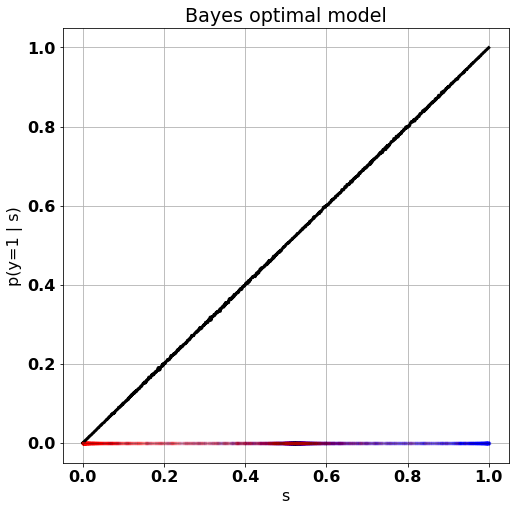

In [14]:
# draw reliability diagram

matplotlib.pyplot.figure(figsize=(8.0, 8.0))
matplotlib.pyplot.plot(numpy.linspace(0, 1, N_grid-1), p_y_hat[0, :], 'k', linewidth=3)
matplotlib.pyplot.plot(s_sample[y[:, 0]==1, 0], numpy.zeros(numpy.sum(y[:, 0]==1)), 'bo', markersize=3, alpha=0.01)
matplotlib.pyplot.plot(s_sample[y[:, 0]==0, 0], numpy.zeros(numpy.sum(y[:, 0]==0)), 'ro', markersize=3, alpha=0.01)
matplotlib.pyplot.xlabel('s')
matplotlib.pyplot.ylabel('p(y=1 | s)')
matplotlib.pyplot.title('Bayes optimal model')
matplotlib.pyplot.grid()